<a href="https://colab.research.google.com/github/sefahw/machine-learning-assignment/blob/main/housing_price_forcasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
import pandas as pd
df=pd.read_csv("train.csv")
train_df=df[["GrLivArea","YearBuilt","SalePrice"]]
train_df

,GrLivArea,YearBuilt,SalePrice
0,1710,2003,208500
1,1262,1976,181500
2,1786,2001,223500
3,1717,1915,140000
4,2198,2000,250000
...,...,...,...
1455,1647,1999,175000
1456,2073,1978,210000
1457,2340,1941,266500
1458,1078,1950,142125


In [81]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *
import matplotlib.pyplot as plt
%matplotlib inline

In [82]:
x=train_df[['GrLivArea','YearBuilt']].values
y=train_df['SalePrice'].values
x_train,x_test,y_train, y_test= train_test_split(x,y)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape) 

(1095, 2) (365, 2) (1095,) (365,)


In [83]:
reg=LinearRegression().fit(x_train,y_train)
reg_predict= reg.predict(x_test)
pd.DataFrame([reg_predict,y_test])

,0,1,2,3,4,5,6,7,8,9,...,355,356,357,358,359,360,361,362,363,364
0,207042.347534,211177.699293,125758.086212,194202.818916,185580.780762,198092.491974,98635.023181,240605.399252,252403.321435,104072.576466,...,137571.42857,244981.121726,275636.207626,151082.282328,118304.038588,75636.695935,193099.531784,220131.351489,270444.333042,345532.269246
1,194201.000000,189000.000000,141000.000000,119000.000000,245500.000000,190000.000000,84900.000000,221000.000000,226000.000000,116000.000000,...,132500.00000,213500.000000,239686.000000,113000.000000,129000.000000,60000.000000,164500.000000,286000.000000,233000.000000,582933.000000


In [84]:
print("Mean Squared Error :",mean_squared_error(y_test,reg_predict))

Mean Squared Error : 1696470732.8755536


In [85]:
def plot_graph(xlabel,ylabel,x,y_true,y_pred):
    plt.title('visualization between'+ xlabel+ 'and' +ylabel)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.scatter(x,y_true,label='true value')
    plt.scatter(x,y_pred, label='predicted values')
    plt.legend()
    plt.show()


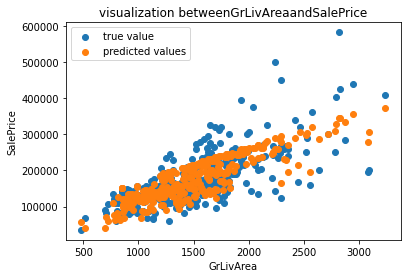

In [86]:
plot_graph('GrLivArea','SalePrice',x_test[:,0],y_test,reg_predict)

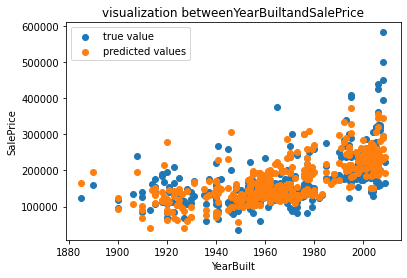

In [87]:
plot_graph('YearBuilt','SalePrice',x_test[:,1],y_test,reg_predict)

In [88]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [89]:
svr=SVR()
svr.fit(x_train,y_train)
svr_predict=svr.predict(x_test)
print("Mean Squared Error :",mean_squared_error(y_test,reg_predict))

Mean Squared Error : 1696470732.8755536


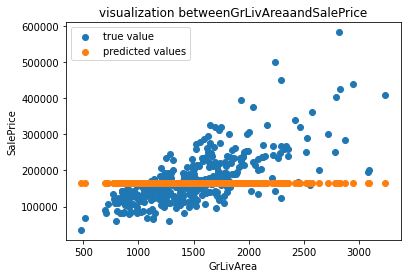

In [90]:
plot_graph('GrLivArea','SalePrice',x_test[:,0],y_test,svr_predict)

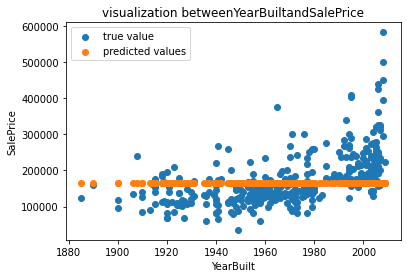

In [91]:
plot_graph('YearBuilt','SalePrice',x_test[:,1],y_test,svr_predict)

In [92]:
d_tree=DecisionTreeRegressor()
d_tree.fit(x_train,y_train)
d_tree_predict=d_tree.predict(x_test)
print("Mean Squared Error :",mean_squared_error(y_test,d_tree_predict))

Mean Squared Error : 2323437656.7181125


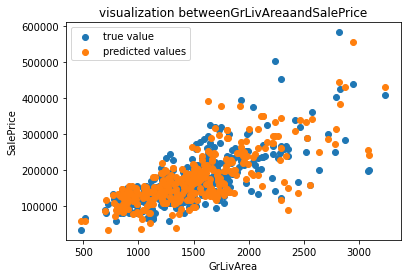

In [93]:
plot_graph('GrLivArea','SalePrice',x_test[:,0],y_test,d_tree_predict)

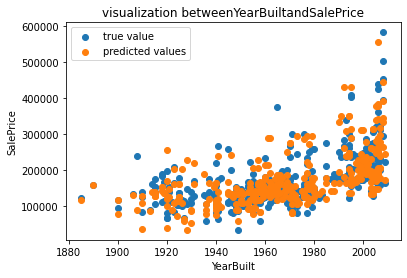

In [94]:
plot_graph('YearBuilt','SalePrice',x_test[:,1],y_test,d_tree_predict)

In [95]:
rand_forest=RandomForestRegressor()
rand_forest.fit(x_train,y_train)
rand_forest_predict=rand_forest.predict(x_test)
print("Mean Squared Error :",mean_squared_error(y_test,rand_forest_predict))

Mean Squared Error : 1366960435.0336795


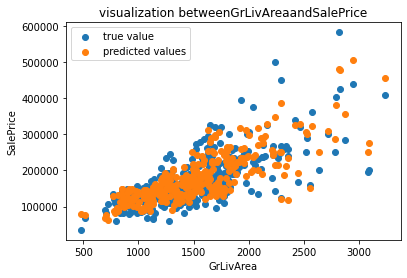

In [96]:
plot_graph('GrLivArea','SalePrice',x_test[:,0],y_test,rand_forest_predict)

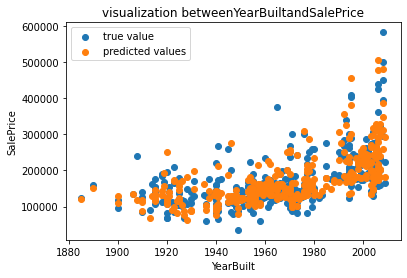

In [97]:
plot_graph('YearBuilt','SalePrice',x_test[:,1],y_test,rand_forest_predict)

In [98]:

train_df2=df[["GrLivArea","YearBuilt","SalePrice","LotArea","YrSold"]]
train_df2

,GrLivArea,YearBuilt,SalePrice,LotArea,YrSold
0,1710,2003,208500,8450,2008
1,1262,1976,181500,9600,2007
2,1786,2001,223500,11250,2008
3,1717,1915,140000,9550,2006
4,2198,2000,250000,14260,2008
...,...,...,...,...,...
1455,1647,1999,175000,7917,2007
1456,2073,1978,210000,13175,2010
1457,2340,1941,266500,9042,2010
1458,1078,1950,142125,9717,2010


In [99]:
x=train_df2[['GrLivArea','YearBuilt','LotArea','YrSold']].values
y=train_df2['SalePrice'].values
x_train,x_test,y_train, y_test= train_test_split(x,y)
# print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

In [100]:
reg=LinearRegression().fit(x_train,y_train)
reg_predict= reg.predict(x_test)
pd.DataFrame([reg_predict,y_test])

,0,1,2,3,4,5,6,7,8,9,...,355,356,357,358,359,360,361,362,363,364
0,178902.257311,251461.788568,198673.164064,217025.544586,168616.627595,298444.541135,124044.060747,410134.19217,281080.119787,133569.163943,...,183527.960621,121499.942163,118307.418144,247503.845166,221221.571049,155732.691299,211581.836767,212577.431347,129108.505319,186181.676376
1,134432.000000,269790.000000,260000.000000,184000.000000,145000.000000,611657.000000,112500.000000,625000.00000,265000.000000,143250.000000,...,234000.000000,129000.000000,128000.000000,226000.000000,187500.000000,121500.000000,191000.000000,228000.000000,136500.000000,147400.000000


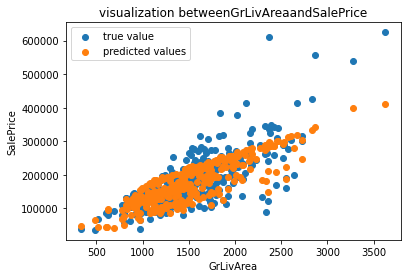

In [101]:
plot_graph('GrLivArea','SalePrice',x_test[:,0],y_test,reg_predict)

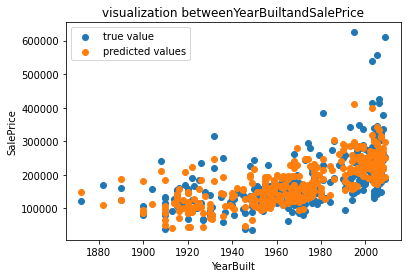

In [102]:
plot_graph('YearBuilt','SalePrice',x_test[:,1],y_test,reg_predict)

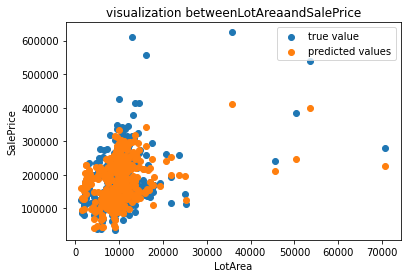

In [103]:
plot_graph('LotArea','SalePrice',x_test[:,2],y_test,reg_predict)

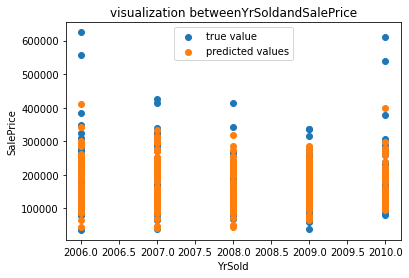

In [104]:
plot_graph('YrSold','SalePrice',x_test[:,3],y_test,reg_predict)

In [105]:
svr=SVR()
svr.fit(x_train,y_train)
svr_predict=svr.predict(x_test)
print("Mean Squared Error :",mean_squared_error(y_test,reg_predict))

Mean Squared Error : 1828565023.262721


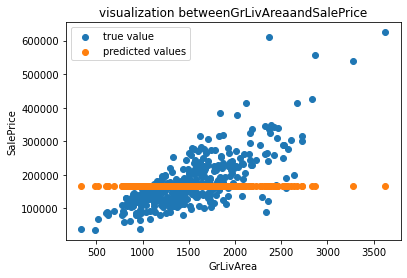

In [106]:
plot_graph('GrLivArea','SalePrice',x_test[:,0],y_test,svr_predict)

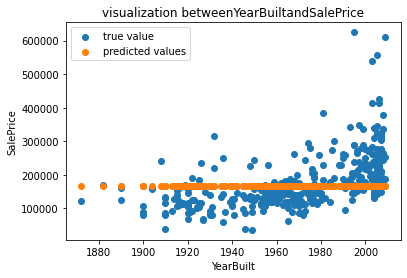

In [107]:
plot_graph('YearBuilt','SalePrice',x_test[:,1],y_test,svr_predict)

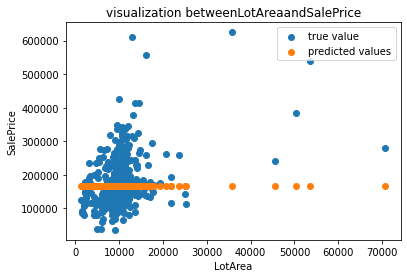

In [108]:
plot_graph('LotArea','SalePrice',x_test[:,2],y_test,svr_predict)

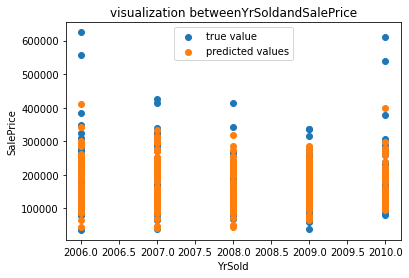

In [109]:
plot_graph('YrSold','SalePrice',x_test[:,3],y_test,reg_predict)

In [110]:
d_tree=DecisionTreeRegressor()
d_tree.fit(x_train,y_train)
d_tree_predict=d_tree.predict(x_test)
print("Mean Squared Error :",mean_squared_error(y_test,d_tree_predict))

Mean Squared Error : 2167266991.1726027


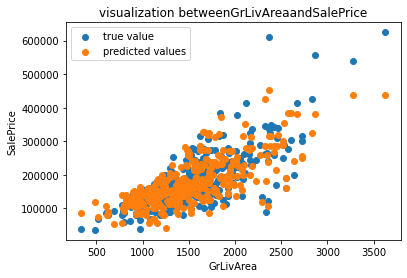

In [111]:
plot_graph('GrLivArea','SalePrice',x_test[:,0],y_test,d_tree_predict)

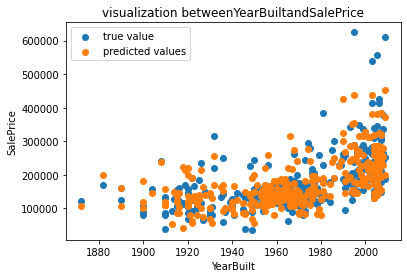

In [112]:
plot_graph('YearBuilt','SalePrice',x_test[:,1],y_test,d_tree_predict)

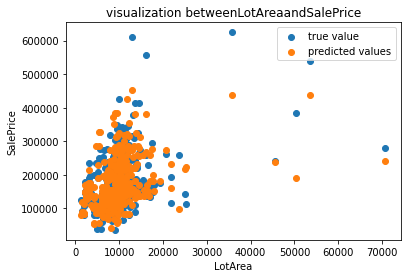

In [113]:
plot_graph('LotArea','SalePrice',x_test[:,2],y_test,d_tree_predict)

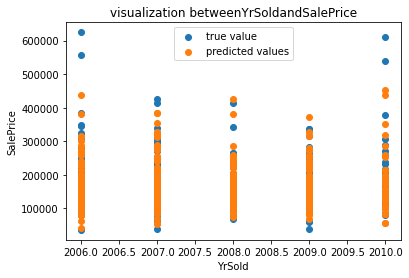

In [114]:
plot_graph('YrSold','SalePrice',x_test[:,3],y_test,d_tree_predict)

In [121]:
rand_forest=RandomForestRegressor()
rand_forest.fit(x_train,y_train)
rand_forest_predict=rand_forest.predict(x_test)
print("Mean Squared Error :",mean_squared_error(y_test,rand_forest_predict))

Mean Squared Error : 1358024996.5402508


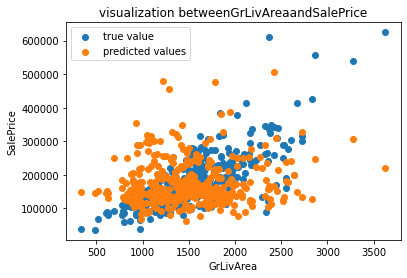

In [115]:
plot_graph('GrLivArea','SalePrice',x_test[:,0],y_test,rand_forest_predict)

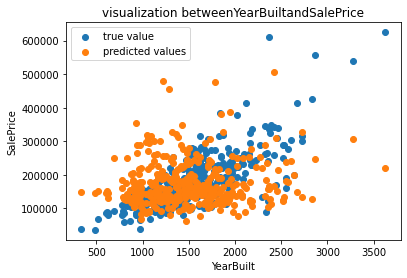

In [116]:
plot_graph('YearBuilt','SalePrice',x_test[:,0],y_test,rand_forest_predict)

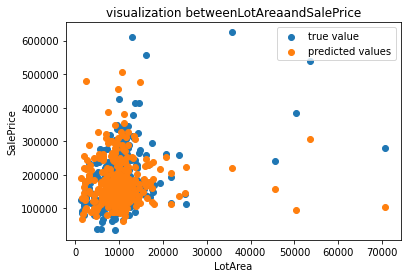

In [119]:
plot_graph('LotArea','SalePrice',x_test[:,2],y_test,rand_forest_predict)

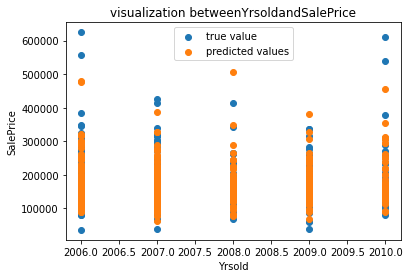

In [120]:
plot_graph('Yrsold','SalePrice',x_test[:,3],y_test,rand_forest_predict)